In [3]:
import torch
import numpy as np

In [2]:
data = [[1,2],[3,4]]
tensor = torch.tensor(data)
tensor

tensor([[1, 2],
        [3, 4]])

In [4]:
np_data = np.array([[5,6],[7,8]])
np_tensor = torch.from_numpy(np_data) 
np_tensor

tensor([[5, 6],
        [7, 8]], dtype=torch.int32)

抗美援朝战争，土地国有化，两弹一星

In [7]:
one_tensor = torch.ones_like(tensor)
rand_tensor = torch.rand_like(tensor, dtype=torch.float) # torch.rand_like() 只支持float
one_tensor, rand_tensor

(tensor([[1, 1],
         [1, 1]]),
 tensor([[0.8061, 0.1375],
         [0.0551, 0.2030]]))

In [10]:
shape = (2, 3, )  # 这个写法更推荐
rand_tensor_shape = torch.rand(shape) 
ones_tensor_shape = torch.ones(shape)
zeros_tensor_shape = torch.zeros(shape)

rand_tensor_shape, ones_tensor_shape, zeros_tensor_shape

(tensor([[0.7337, 0.6301, 0.0710],
         [0.0010, 0.8220, 0.9523]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

Tensor的基本属性包括：形状shape、数据的类型dtype、存在的位置device

Tensor 默认在CPU上，可以手动调整为GPU上

In [11]:
tensor = torch.rand((3,4), dtype=torch.float32) 
tensor.shape, tensor.dtype, tensor.device

(torch.Size([3, 4]), torch.float32, device(type='cpu'))

In [13]:
# We create our tensor in the GPU if available 
if torch.cuda.is_available():
    tensor = torch.rand(shape, device='cuda') 
    pass
# We move our tensor to the GPU if available 
tensor = torch.rand(shape)
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    pass

In [14]:
tensor.shape, tensor.dtype, tensor.device

(torch.Size([2, 3]), torch.float32, device(type='cuda', index=0))

In [16]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0,:]) 
print('First column: ', tensor[:,0])
print('Last column: ', tensor[:,-1]) 
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column:  tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [18]:
tensor = torch.ones(2,2)
t1 = torch.cat([tensor, tensor, tensor], dim=0)  # dim=0就是加行，dim=1就算加列 
print(t1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [23]:
# 矩阵乘法
y1 = tensor @ tensor.T 
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)
print(y1)
print(y2) 
print(y3)

# 元素乘法 
z1 = tensor * tensor 
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor) 
torch.mul(tensor, tensor, out=z3)
print(z1)
print(z2) 
print(z3)

tensor([[2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]])


In [30]:
print(tensor)
tensor.add_(5)  # in-place就是自覆盖操作，相当于x+=1 
tensor.add(5)  # 这就是非自覆盖操作 

tensor([[11., 11.],
        [11., 11.]])


tensor([[16., 16.],
        [16., 16.]])

# 数据集加载

In [2]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets 
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt 

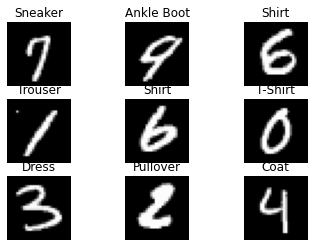

In [10]:
# Download dataset 

train_data = datasets.MNIST(root='mnist', train=True, transform=ToTensor(), download=True) 
test_data = datasets.MNIST(root="mnist", train=False, transform=ToTensor(), download=True)

# Iteration and Visualizing the Dataset 
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure() 
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

Features batch shape: torch.Size([64, 1, 28, 28])
Lables batch shape: torch.Size([64])


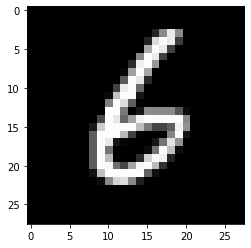

label: 6


In [12]:
train_features, train_labels = next(iter(train_loader))
print(f"Features batch shape: {train_features.size()}")
print(f"Lables batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"label: {label}")

In [13]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [14]:
# 指定训练设备平台
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device") 

# 定义网络
# 需要继承`nn.Module`,
# 在`__init__`初始化网络的layers
# 网络正向即对输入数据的处理在`forward`函数实现
class MyNet(nn.Module):
    def __init__(self):
        # 这是干啥
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()  # 将28*28的图像转化为784的数组
        self.linear_relu_stack = nn.Sequential(  # 装载module的顺序容器
            nn.Linear(28*28, 512),  # 输入层 Wu  利用权重和偏执对输入数据进行线性映射
            nn.ReLU(),
            nn.Linear(512, 512),  # 中间层 Wu 
            nn.ReLU(),
            nn.Linear(512, 10),  # 输出层 Wu
        )

    def forward(self, x):  # 对输入数据的处理
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = MyNet().to(device)  # 指定网络创建设备
print(model)

Using cuda device
MyNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [17]:
x = torch.rand(1, 28, 28, device=device) 
logits = model(x) 
print(f"logits: {logits}")

logits: tensor([[-0.0150,  0.0074, -0.1030, -0.0743,  0.0004, -0.0484,  0.0209,  0.0856,
         -0.0774, -0.0021]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [18]:
pred_probab = nn.Softmax(dim=1)(logits)  # 将[-infty, infty]的输入映射到[0,1]从而表征模型对于每个类的预测概率，dim参数指示哪个维度的和必须为1
print(f"pred_probab: {pred_probab}")

pred_probab: tensor([[0.1004, 0.1027, 0.0920, 0.0946, 0.1020, 0.0971, 0.1041, 0.1110, 0.0943,
         0.1017]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [19]:
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7], device='cuda:0')


In [20]:
# 模型参数追踪
print(f"Model parameter: {model}\n\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | size: {param.size()} | value: {param[:2]}\n")

Model parameter: MyNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | size: torch.Size([512, 784]) | value: tensor([[-0.0128,  0.0171,  0.0311,  ..., -0.0063, -0.0215,  0.0096],
        [ 0.0076, -0.0316, -0.0082,  ..., -0.0265,  0.0200,  0.0055]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | size: torch.Size([512]) | value: tensor([-0.0244, -0.0271], device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | size: torch.Size([512, 512]) | value: tensor([[-0.0092,  0.0328, -0.0034,  ..., -0.0170, -0.0338,  0.0378],
        [-0.0031,  0.0352,  0.0201,  ..., -0.0158,  0.0259, -0.0398]],
       device='cuda:0', grad_fn=<SliceBackward0>)



In [ ]:
# 三个超参数

learning_rate = 1e-3  # 学习率，每次更新步长
batch_size = 64  # 输入模型的数据元素个数
epochs = 5  # 迭代次数

In [ ]:
# Loss function

# 通常的，回归任务使用均值方差-nn.MSELoss; 分类任务使用负对数似然方差-nn.NLLLoss,交叉熵nn.CrossEntropyLoss融合了两者

loss_fn = nn.CrossEntropyLoss()

In [ ]:
# 优化器 

# 用于校正参数使模型loss最小，Pytorch支持的优化算法有很多…… SGD,ADAM, RMSProp等 

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [2]:
import torch
from torch import nn
from torchvision import datasets  # 教程数据集位置
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# dataset
train_data = datasets.MNIST(  # 导入教程训练集
    root="mnist",
    train=True,
    transform=ToTensor(),
    download=False,
)
test_data = datasets.MNIST(  # 导入教程测试集
    root="mnist",
    train=False,
    transform=ToTensor(),
    download=False,
)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)  # 载入训练数据
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)  # 载入测试数据

# 指定训练设备平台
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 定义网络
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = MyNet().to(device)

# 超参数
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        # unset gradients of model parameters.
        optimizer.zero_grad()
        # Backpropagate the prediction loss
        loss.backward()
        # Adjuct model parameters
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    # no grad in validate/test.
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
print("Done!")

Using cuda device
Epoch 1
-------------------------------


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

# 莫烦PYTHON

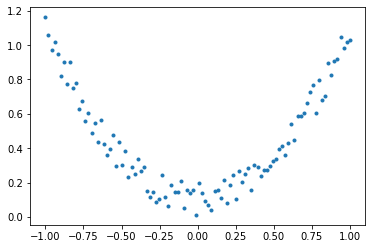

In [8]:
import torch
import matplotlib.pyplot as plt 

x = torch.linspace(-1,1,100)
x = torch.unsqueeze(x, dim=1)
y = torch.pow(x,2) + 0.2 * torch.rand(x.size())  

plt.plot(x.data.numpy(),y.data.numpy(),'.')

In [9]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() 

        self.hidden = torch.nn.Linear(n_feature, n_hidden) 
        self.predict = torch.nn.Linear(n_hidden, n_output)

        pass
    def forward(self, x):

        x = torch.nn.functional.relu(self.hidden(x)) 
        x = self.predict(x) 
        
        return x 
    pass

net = Net(n_feature=1, n_hidden=10, n_output=1) 

print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


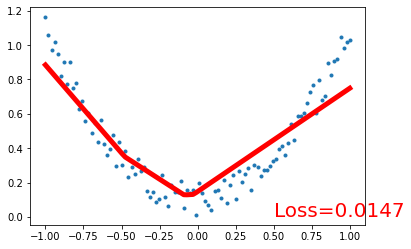

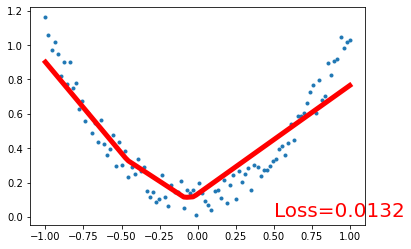

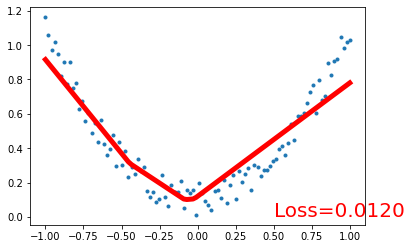

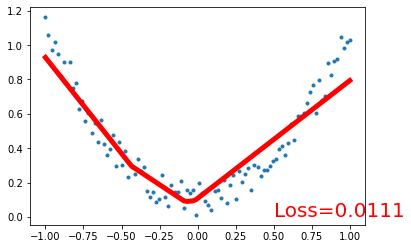

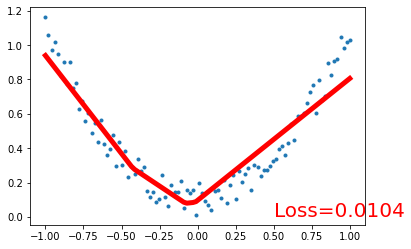

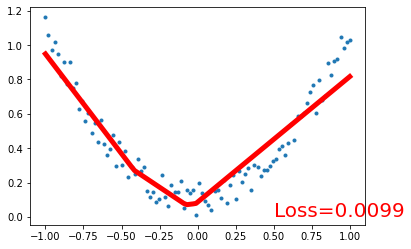

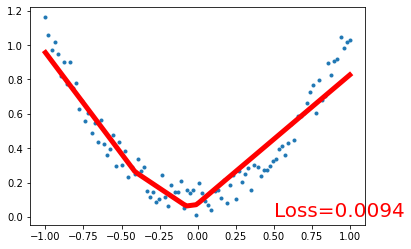

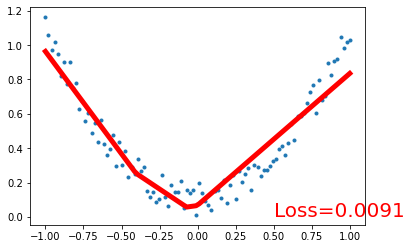

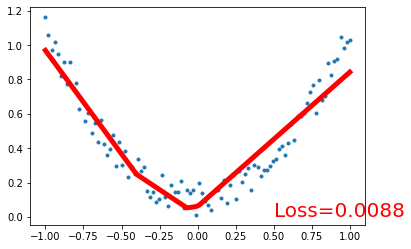

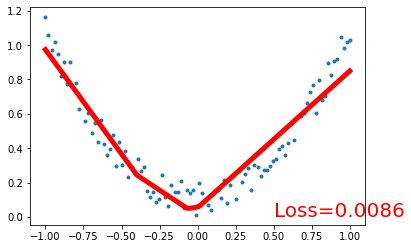

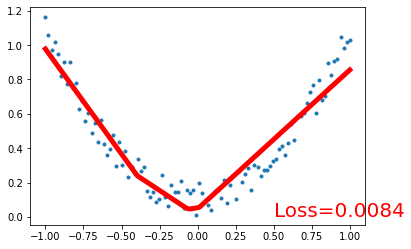

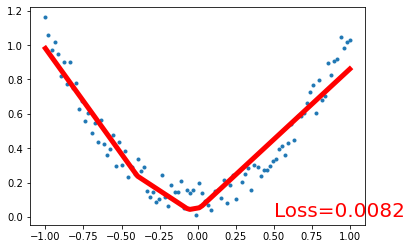

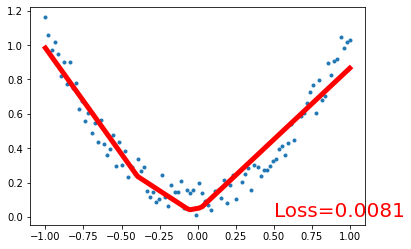

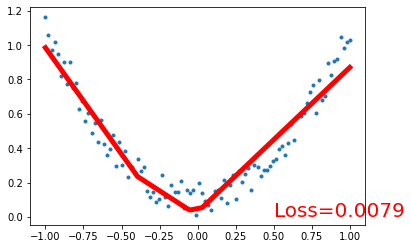

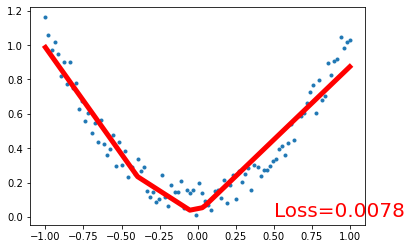

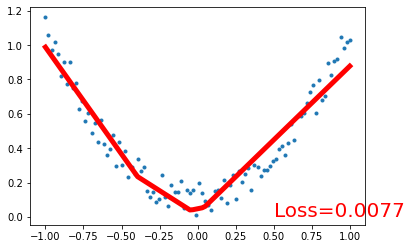

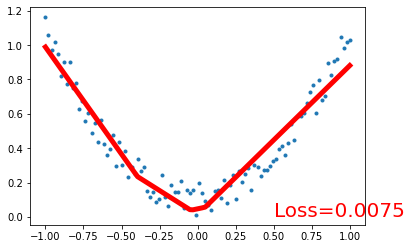

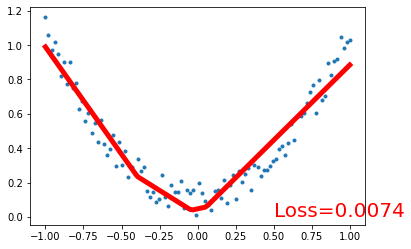

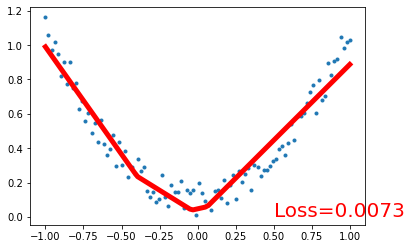

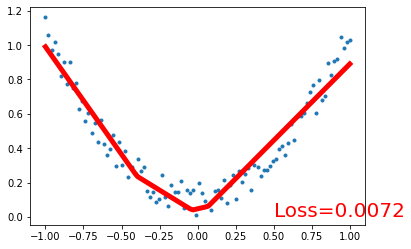

In [11]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) 
loss_func = torch.nn.MSELoss() 

for t in range(100):
    prediction = net(x) 
    loss = loss_func(prediction, y)
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

    if t % 5 == 0:
        plt.cla() 
        plt.plot(x.data.numpy(), y.data.numpy(), '.') 
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) 
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

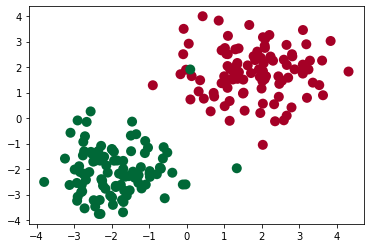

In [1]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [2]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)  # 这里为什么是out() 不是 predict()
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture


Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


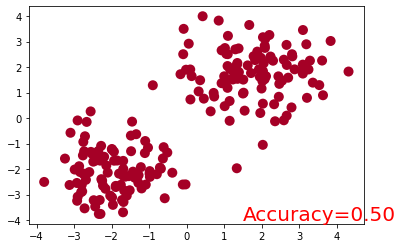

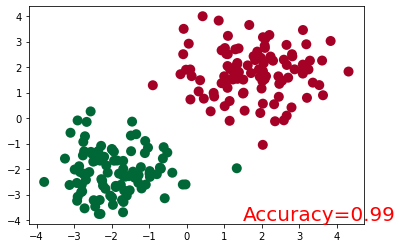

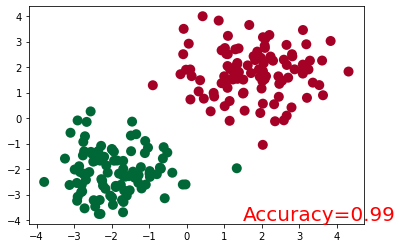

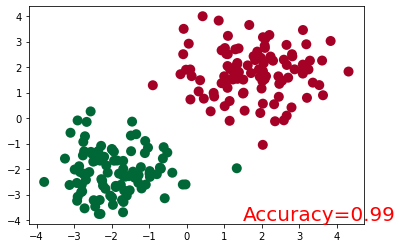

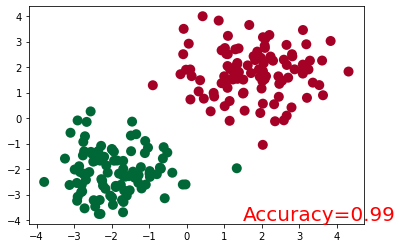

In [3]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [5]:
print(prediction) 
print(out)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([[ 1.9330, -3.5194],
        [ 1.3985, -2.1613],
        [ 0.9922, -1.5192],
        [ 1.6870, -2.5031],
        [ 2.7190, -4.3178],
        [ 1.4602, -2.1991],
        [ 2.0284, -3.5730],
        [ 1.0357, -1.4886],
        [ 2.1148, -3.2063],
        [ 1.3608, -2.2647],
        [ 1.2301, -1.8618],
        [ 1.0292, -